## Abalone Age Prediction
### Dhakshesh.T (Team Lead : 1907009)
### Team ID : PNT2022TMID52690

### 1.Importing necessary packages & Downloading the packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
from collections import Counter
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn.metrics import r2_score,mean_absolute_error

### 2. Download the dataset

In [2]:
df= pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### 3. Visualizations

#### (i) Univariate Analysis

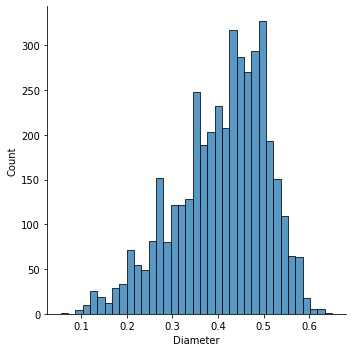

In [3]:
sns.displot(df["Diameter"])

<AxesSubplot:xlabel='index', ylabel='Rings'>

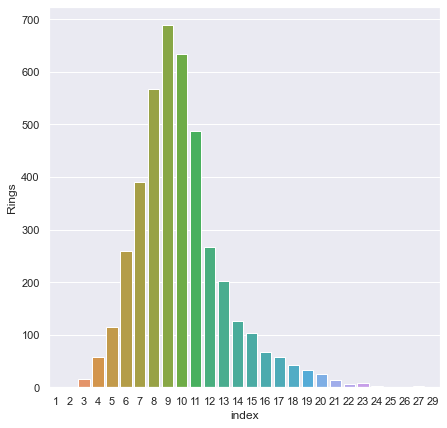

In [4]:
sns.set(rc={'figure.figsize':(7,7)})
depth = df['Rings'].value_counts(normalize=False).reset_index()
sns.barplot(data=depth,x='index',y='Rings')

<AxesSubplot:ylabel='Sex'>

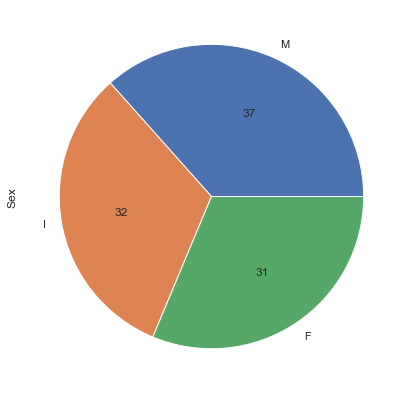

In [5]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.0f')

#### (ii) BiVariate Analysis

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rings', ylabel='count'>

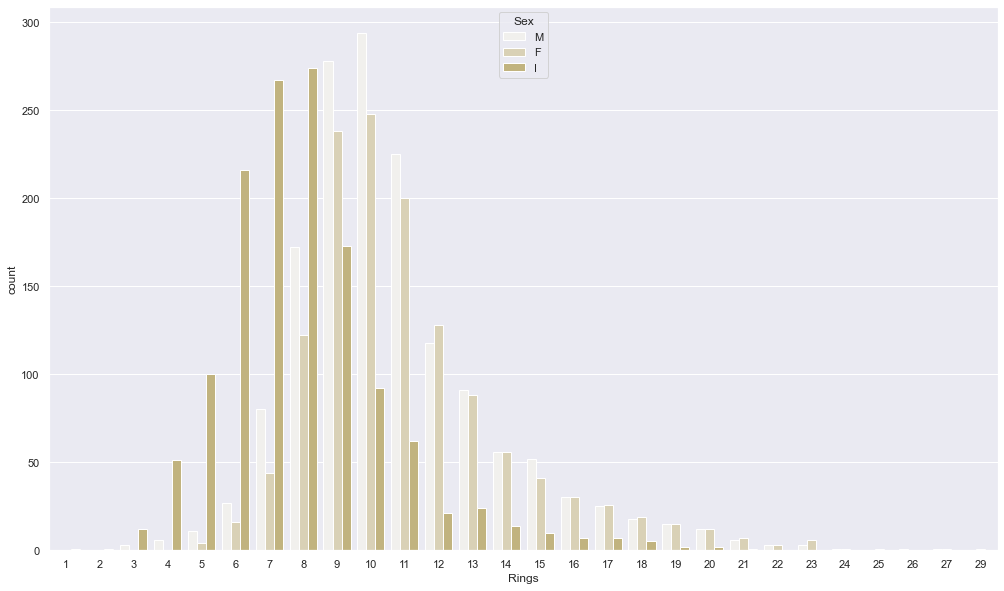

In [6]:
sns.set(rc={'figure.figsize':(17,10)})
sns.countplot(df['Rings'] ,hue = df['Sex'] ,color ='y')

Text(0, 0.5, 'Length')

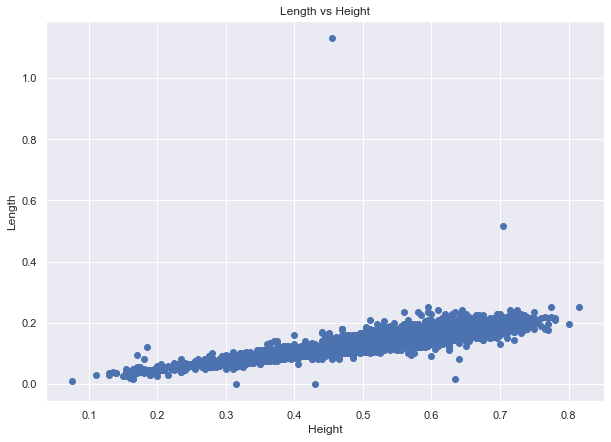

In [7]:
sns.set(rc={'figure.figsize':(10,7)})
plt.scatter(df.Length, df.Height)
plt.title('Length vs Height')
plt.xlabel('Height')
plt.ylabel('Length')

#### (iii) MultiVariate Analysis

<Figure size 864x720 with 0 Axes>

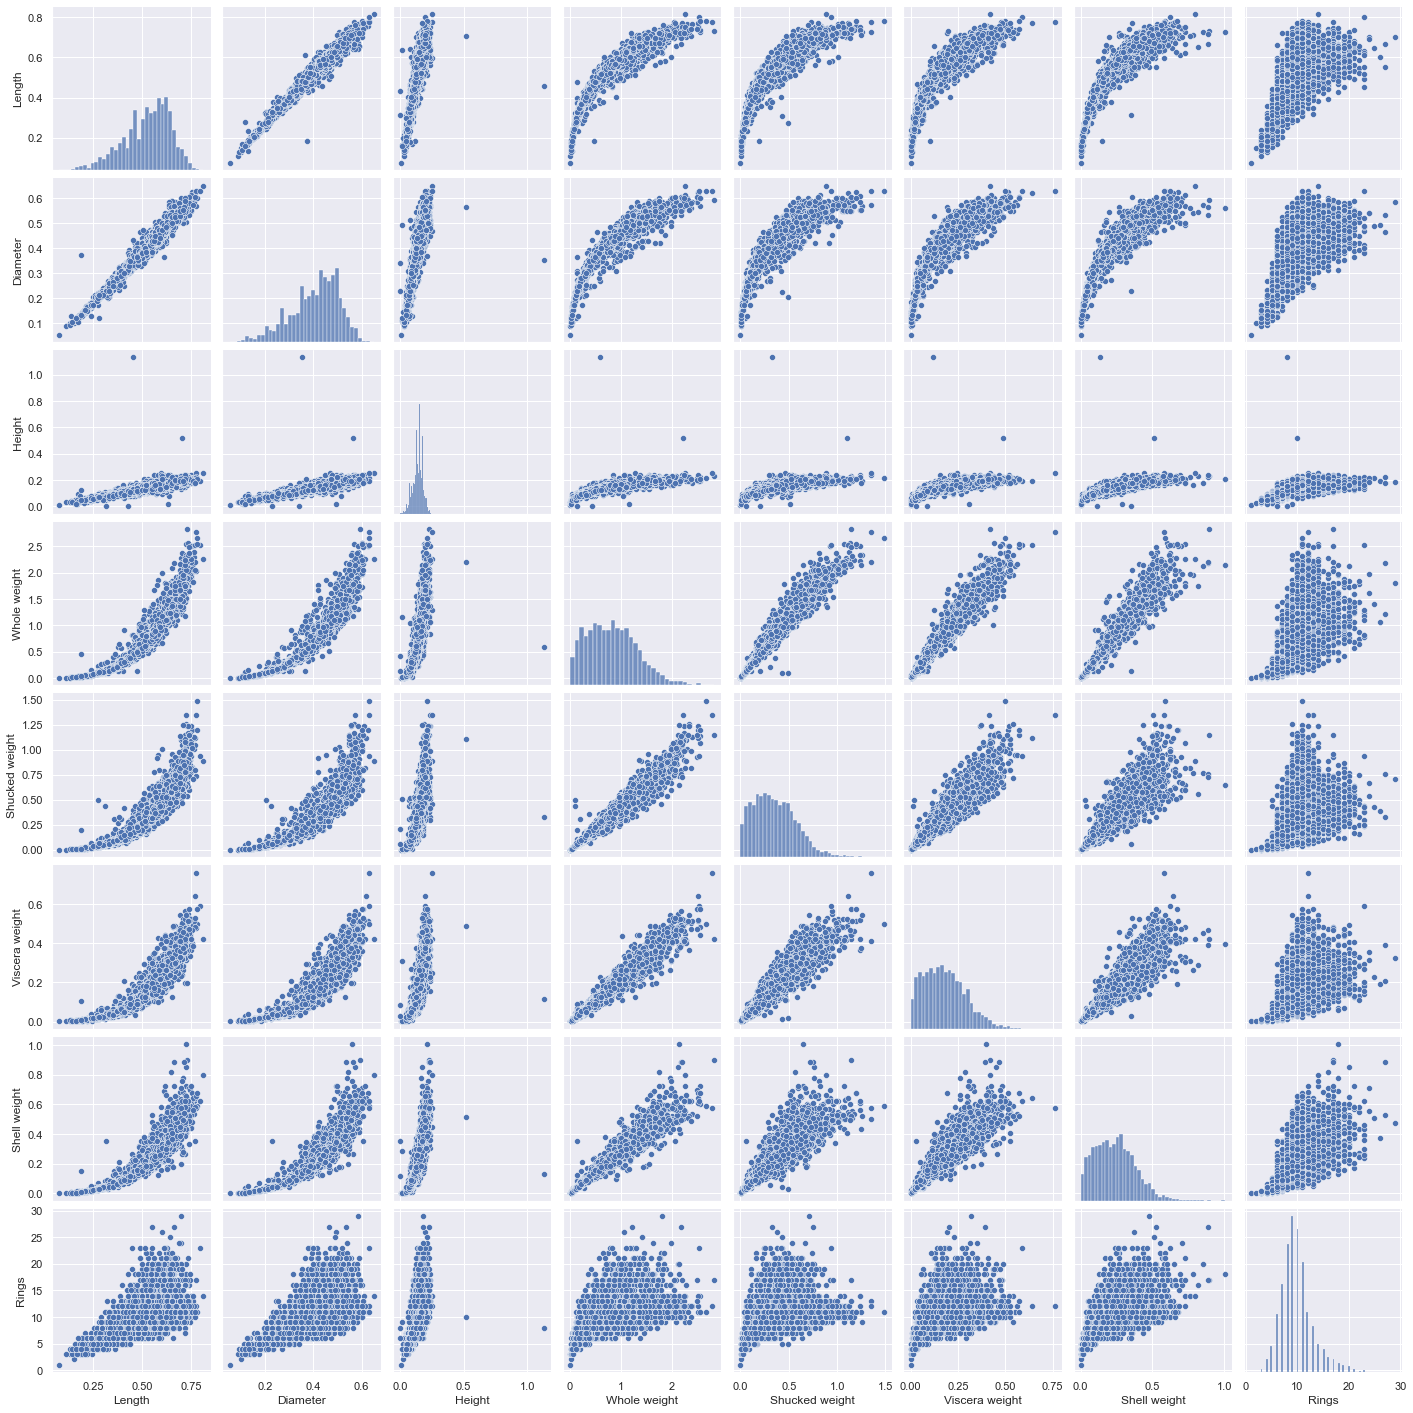

In [8]:
plt.figure(figsize=(12,10))
sns.pairplot(df) 

<AxesSubplot:>

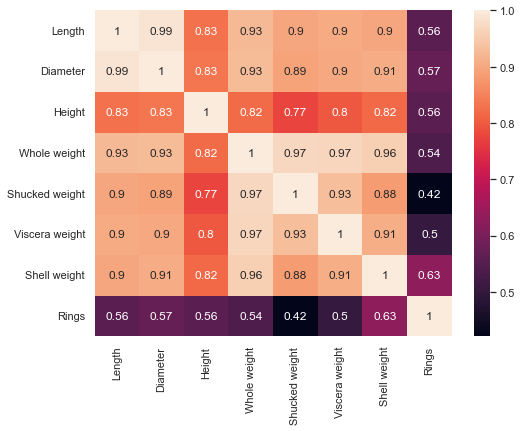

In [9]:
plt.figure(figsize = (8,6))
corr = df.corr()
sns.heatmap(corr, annot = True)

### 4.Descriptive Statistics

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
df.describe() 

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### 5.Handle Missing Values

In [12]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

The dataset is void of missing values so we can proceed to the next step

### 6. Outlier Detection

In [13]:
outlier_correction_df = df.drop(columns=['Sex'],axis=1)
outlier_correction_df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [14]:
def detection(df,features):
    outlier_indices=[]
    
    for c in features:
        Q1 = np.percentile(df[c],25)
        
        Q3 = np.percentile(df[c],75)
        
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        lower_range = Q1 - (outlier_step)
        upper_range = Q3 + (outlier_step)
        
        outlier_list_col=df[  (df[c] < lower_range) | (df[c] > upper_range)  ].index
       
        outlier_indices.extend(outlier_list_col)
    return outlier_indices

def multiple_outlier_indices(outlier_indices):
        
    outlier_indices=Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers

In [15]:
outlier_correction_df.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [16]:
outliers=detection(df,['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'])

In [17]:
Counter(outliers)

Counter({148: 2,
         149: 2,
         236: 3,
         237: 3,
         238: 3,
         239: 3,
         305: 2,
         306: 3,
         321: 2,
         465: 2,
         523: 2,
         525: 2,
         526: 2,
         611: 2,
         694: 3,
         696: 2,
         718: 3,
         719: 3,
         720: 3,
         1053: 2,
         1054: 2,
         1055: 2,
         1056: 1,
         1210: 1,
         1429: 3,
         1824: 2,
         1986: 2,
         1987: 3,
         2114: 3,
         2115: 2,
         2169: 3,
         2171: 3,
         2343: 2,
         2371: 2,
         2380: 2,
         2381: 3,
         2458: 2,
         2711: 3,
         3141: 2,
         3143: 2,
         3190: 3,
         3318: 2,
         3380: 2,
         3472: 2,
         3600: 2,
         3837: 3,
         3899: 3,
         3902: 3,
         3994: 2,
         43: 1,
         44: 1,
         520: 1,
         892: 1,
         898: 1,
         1988: 1,
         2172: 2,
         2545: 1,


In [18]:
multiple_outlier_indices = multiple_outlier_indices(outliers)

In [19]:
print(Counter(multiple_outlier_indices))

Counter({236: 1, 237: 1, 238: 1, 239: 1, 306: 1, 694: 1, 718: 1, 719: 1, 720: 1, 1429: 1, 1987: 1, 2114: 1, 2169: 1, 2171: 1, 2381: 1, 2711: 1, 3190: 1, 3837: 1, 3899: 1, 3902: 1, 1428: 1, 1763: 1, 165: 1, 891: 1, 1052: 1, 1193: 1, 1206: 1, 1207: 1, 1209: 1, 1427: 1, 1761: 1, 1762: 1, 2623: 1, 2624: 1, 2811: 1, 2863: 1, 3427: 1, 3715: 1})


In [20]:
df=df.drop(multiple_outlier_indices,axis=0).reset_index(drop = True)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4134,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4135,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4136,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4137,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [21]:
df.shape

(4139, 9)

### 7. Categorical Attribute Encoding

In [22]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [23]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### 8. Seperate dataframe into Predictor and Target

In [24]:
feature =pd.DataFrame(df.drop(['Rings'], axis = 1))
label = pd.DataFrame(df.Rings)

### 9. Scaling the Predictor variables 

In [25]:
convert = StandardScaler()
feature = pd.DataFrame(convert.fit_transform(feature))

### 10. Perform the train test split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.2, random_state = 0)

In [27]:
print('X_train : ')
print(X_train)
print(X_train.shape)

print('')
print('X_test : ')
print(X_test)
print(X_test.shape)

print('')
print('y_train : ')
print(y_train)
print(y_train.shape)

print('')
print('y_test : ')
print(y_test)
print(y_test.shape)

X_train : 
             0         1         2         3         4         5         6  \
64    1.151942 -0.040971 -0.087769 -0.481759 -0.514480 -0.574405 -0.453057   
1521 -0.062807 -1.409929 -1.432469 -1.091508 -1.310493 -1.322352 -1.158735   
3436  1.151942  1.670227  1.618965  1.469438  2.013909  1.674082  1.916340   
3444 -0.062807 -0.768230 -0.760119 -0.725659 -0.868496 -0.720742 -0.798886   
3993 -0.062807 -0.725450 -0.863557 -0.725659 -0.689393 -0.462910 -0.565218   
...        ...       ...       ...       ...       ...       ...       ...   
1033  1.151942  1.413547  1.205212  0.859689  1.832711  2.173488  1.701365   
3264  1.151942  1.028527  0.946616  1.225538  0.845026  0.772829  0.916240   
1653 -1.277555  0.729068  0.688019  0.493839  0.607270  0.120118  0.402169   
2607 -0.062807 -0.725450 -0.708400 -0.969558 -0.876875 -0.690546 -0.995167   
2732 -0.062807  0.215709  0.119108  0.371889  0.180984  0.638106  0.004933   

             7  
64   -0.390700  
1521 -1.300351  
3

### 11.Build Model

In [28]:

pipelines={
'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
'ridge':make_pipeline(Ridge(random_state=1234)),
'lasso':make_pipeline(Lasso(random_state=1234)),
}

In [29]:
hyperparagrid={
'rf':{
'randomforestregressor__min_samples_split':[2,4,6],
'randomforestregressor__min_samples_leaf':[1,2,3]
},
    
'ridge':{
    'ridge__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
},
'lasso':{
    'lasso__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
}
}

### 12. Traning the Model

In [30]:
fit_models={}
for algo,pipeline in pipelines.items():
    model=GridSearchCV(pipeline,hyperparagrid[algo],cv=10,n_jobs=-1)
    try:
        print('Start training for {}'.format(algo))
        model.fit(X_train,y_train)
        fit_models[algo]=model
    except NotFittedError as e:
        print(repr(e))

Start training for rf


c:\python\python39\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Start training for ridge
Start training for lasso


### 13,14 Testing and Measuring Performance

In [31]:
best_model_rf=fit_models['rf']
best_model_rf

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(random_state=1234))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__min_samples_leaf': [1, 2, 3],
                         'randomforestregressor__min_samples_split': [2, 4, 6]})

In [32]:
best_model_ridge=fit_models['ridge']
best_model_ridge

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ridge', Ridge(random_state=1234))]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                          0.99]})

In [33]:
best_model_lasso=fit_models['lasso']
best_model_lasso

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('lasso', Lasso(random_state=1234))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                          0.99]})

In [34]:
for algo,model in fit_models.items():
    ya=model.predict(X_test)
    print('{} scores-R2:{} MAE:{}'.format(algo,r2_score(y_test,ya), mean_absolute_error(y_test,ya)))

rf scores-R2:0.5255029479701915 MAE:1.570513566816263
ridge scores-R2:0.5189099860811324 MAE:1.6528099660919895
lasso scores-R2:0.5190720174119673 MAE:1.6525494856846143
